<a href="https://colab.research.google.com/github/am-eric/Cousera-projects/blob/main/Multi_variate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=left>Multivariate Linear Regression.</h2>

---

 In this notebook i will predict the house prices  based on various variables.

## Step 1: Load the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


### Scaling the data
Standard scaling
The standardized data is calculated using the formula $X_{\text{standardized}} = \frac{X - \mu}{\sigma}$ where $X$ is the original data, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.




In [ ]:
df = (df - df.mean())/df.std()

In [ ]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,-0.207071,0.651256,-0.517023,-0.459145,0.789470,1.227165,0.163723,0.911897,-0.950901,0.350880,1.002400
1,-0.091855,-0.071812,2.178881,0.466305,0.789470,-0.761360,0.163723,-0.318574,0.600289,-0.060710,1.002400
2,0.073455,0.651256,-0.517023,-0.313261,0.789470,1.227165,0.163723,-0.318574,0.600289,0.631510,1.002400
3,-0.096864,0.651256,-0.517023,-0.687089,-1.025689,-0.761360,0.163723,0.296662,0.600289,0.790533,-0.996922
4,0.375020,1.374324,-0.517023,0.199611,0.789470,1.227165,1.389547,1.527133,0.600289,1.697903,1.002400


In [4]:
X = df.iloc[:, :-1].values
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [5]:
y = df.iloc[:, -1].values

y

array([1, 1, 1, ..., 1, 0, 0])

$h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
import numpy as np

In [ ]:
def cost_function(X,y, theta):
    m = len(df)
    y_pred = X.dot(theta)
    error = (y_pred - y) **2

    return 1/(2*m) * np.sum(error)

Lets ensure that X has the correct shape: (m, n+1), where m is the number of samples (rows) and n is the number of features (columns). Additionally, you add an extra column of 1's as the first column to account for the intercept term.

In [ ]:
X = np.c_[np.ones((len(X), 1)), X]

In [ ]:
#theta array to have the shape (11, 1) to account for the 11 parameters:
#one for the intercept and 10 for the coefficients of the 10 independent variables.
theta = np.zeros(11)

cost_function(X, y, theta)

0.49965753424657516

In [ ]:
theta.shape

(11,)

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(df)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        theta -= alpha * (1/m) * np.dot(X.T, error)
        costs.append(cost_function(X, y, theta))
    return theta, costs



In [ ]:
# Now, run the gradient_descent function
theta = np.zeros(X.shape[1])
theta, costs = gradient_descent(X, y, theta, alpha=0.001, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0], 2)), str(round(theta[1], 2))))


h(x) = 0.0 + 0.04x1


In [ ]:
print(X.shape)
print(y.shape)

(1460, 11)
(1460,)


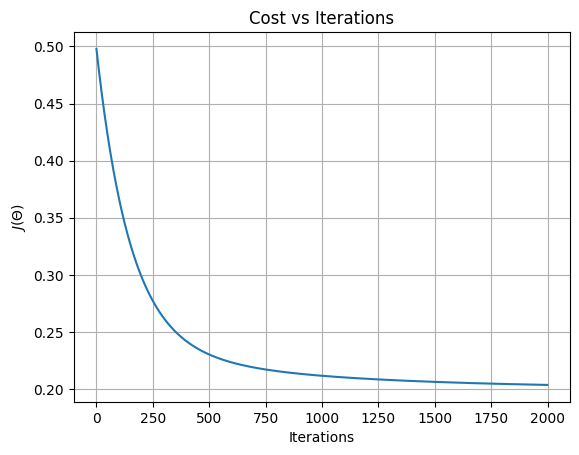

In [ ]:
# Plot the cost function against the number of iterations
import matplotlib.pyplot as plt
plt.plot(costs)

plt.xlabel('Iterations')
plt.ylabel('$J(\\Theta)$')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()

In [ ]:
def predict(X, theta):
  y_pred = np.dot(theta.transpose(), X)
  return y_pred


In [ ]:
sample_features = np.array([1, 10000, 7, 5, 2000, 2, 3, 7, 2, 500])

# Adding a 1 as the first element to account for the intercept term
sample_features_with_intercept = np.insert(sample_features, 0, 5)

# Use the predict function to get the predicted price
predicted_price = predict(sample_features_with_intercept, theta)

print("The model predicts a house price of ${:.2f}".format(predicted_price))

The model predicts a house price of $3309.91


### USING SCIKIT LEARN

###Split data into Train and Test Set.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Model Training and fitting
---



In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:11], y_test[:11]))

Predictions: [ 0.11775403  1.17250817  0.19729244  0.68587201  1.12515963 -0.0892719
  0.62892874  0.72800179 -0.08830059  0.16660709  0.64343535], Actual Values: [0 1 0 0 1 0 1 0 0 0 0]
